In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from gensim.models.tfidfmodel import TfidfModel
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

-Make confusion matrix more readable
-XGB plot features
-Plot confusion matrix?

In [56]:
#Read in dataframe from Spotify Data Extraction section containing musical attributes
spotify_df = pd.read_csv('spotify_genre_df_cleaned5.csv')

In [8]:
spotify_df.head(5)

,track_name,artist,album,track_id,playlist_name,danceability,energy,full_key,key,mode,...,lyrics_cleaned,named_entities,word_count_cleaned,word_count_unique,word_count_cleaned_unique,entity_count_unique,count_artist,count_track,count_album,lyrics_cleaned_str
0,Dani California,Red Hot Chili Peppers,Stadium Arcadium,10Nmj3JCNoMeBQ87uw5j8k,Rock,0.556,0.913,C Major,C,Major,...,"['gettin', 'born', 'state', 'mississippi', 'po...","[mississippi poppa, alabama, sweet louisiana r...",161.0,144.0,105.0,22.0,322.0,1793.0,967.0,gettin born state mississippi poppa copper mom...
1,Californication,Red Hot Chili Peppers,Californication (Deluxe Edition),48UPSzbZjgc449aqz8bxox,Rock,0.592,0.767,A Minor,A,Minor,...,"['psychic', 'spy', 'china', 'try', 'steal', 'e...","(china, sweden, east, hollywood, hollywood, al...",154.0,151.0,98.0,6.0,322.0,1793.0,967.0,psychic spy china try steal elation little gir...
2,The Pretender,Foo Fighters,"Echoes, Silence, Patience & Grace",7x8dCjCr0x6x2lXKujYD34,Rock,0.433,0.959,A Major,A,Major,...,"['keep', 'dark', 'know', 'pretend', 'keep', 'd...",(),174.0,106.0,66.0,0.0,322.0,1793.0,967.0,keep dark know pretend keep dark began send sk...
3,Smells Like Teen Spirit,Nirvana,Nevermind (Remastered),5ghIJDpPoe3CfHMGu71E6T,Rock,0.502,0.912,C# Major,C#,Major,...,"['load', 'gun', 'bring', 'friend', 'fun', 'los...",(),138.0,85.0,48.0,0.0,322.0,1793.0,967.0,load gun bring friend fun lose pretend oh know...
4,Scar Tissue,Red Hot Chili Peppers,Californication (Deluxe Edition),1G391cbiT3v3Cywg8T7DM1,Rock,0.595,0.717,C Major,C,Major,...,"['scar', 'tissue', 'wish', 'saw', 'sarcastic',...","(kentucky, fallin, ma, pa, viewin, autumn)",115.0,79.0,49.0,6.0,322.0,1793.0,967.0,scar tissue wish saw sarcastic mister close ey...


In [57]:
#spotify_df = spotify_df.rename(columns={'playlist_name':'genre'})

In [60]:
spotify_df.columns

Index(['track_name', 'artist', 'album', 'track_id', 'genre', 'danceability',
       'energy', 'full_key', 'key', 'mode', 'loudness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_minutes',
       'duration_ms', 'time_signature', 'lyrics', 'lyrics_tokenized',
       'word_count', 'lyrics_cleaned', 'named_entities', 'word_count_cleaned',
       'word_count_unique', 'word_count_cleaned_unique', 'entity_count_unique',
       'count_artist', 'count_track', 'count_album', 'lyrics_cleaned_str'],
      dtype='object')

In [59]:
#del spotify_df['Unnamed: 0']

In [61]:
label_encoder = LabelEncoder()
spotify_df['full_key_num'] = label_encoder.fit_transform(spotify_df['full_key'])
spotify_df['mode_num'] = label_encoder.fit_transform(spotify_df['mode'])
spotify_df['time_signature_num'] = label_encoder.fit_transform(spotify_df['time_signature'])

In [63]:
spotify_df[numerical_variables[11:]]

,full_key_num,mode_num,time_signature_num
0,6,0,2
1,1,1,2
2,0,0,2
3,8,0,2
4,6,0,2
...,...,...,...
9995,20,0,2
9996,14,0,2
9997,0,0,2
9998,20,0,2


In [62]:
numerical_variables = ['danceability', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 
                       'valence', 'tempo', 'duration_minutes', 'word_count', 'word_count_unique', 
                       'full_key_num', 'mode_num', 'time_signature_num']

#Feature Selection - Create Feature and Target Matrix
features = spotify_df[numerical_variables]

target = spotify_df['genre']

#Reset train test split X and Y arrays with all 16 variables
X_train, X_test, y_train, y_test = train_test_split(features , target, test_size = 0.2, random_state = 0)

In [64]:
X_train

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo,duration_minutes,word_count,word_count_unique,full_key_num,mode_num,time_signature_num
7389,0.797,0.375,-7.552,0.1460,0.000000,0.0767,0.171,139.999,3.200750,737.0,206.0,21,1,2
9275,0.600,0.496,-9.594,0.0247,0.001600,0.2560,0.516,100.511,3.872883,210.0,86.0,16,0,2
2995,0.393,0.805,-2.520,0.0471,0.000137,0.0746,0.325,74.931,3.286667,153.0,51.0,8,0,2
5316,0.570,0.664,-4.718,0.0322,0.000012,0.0719,0.487,162.084,3.558667,459.0,110.0,7,1,2
356,0.658,0.814,-4.631,0.0558,0.006760,0.2160,0.690,108.016,3.060033,266.0,64.0,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0.513,0.488,-11.603,0.0321,0.006110,0.1200,0.947,169.601,4.282883,0.0,0.0,16,0,2
4859,0.634,0.153,-14.409,0.0622,0.000000,0.1340,0.318,77.770,3.692300,324.0,114.0,14,0,2
3264,0.474,0.749,-5.113,0.0363,0.000074,0.0642,0.100,121.969,5.904767,206.0,86.0,5,1,2
9845,0.573,0.847,-7.251,0.0341,0.000082,0.3830,0.795,153.971,3.251783,186.0,80.0,18,0,2


In [65]:
#Random Forest Classifier
param_grid = {'max_depth': range(5, 50, 5), 'n_estimators': range(1, 20)} 
rand_forest_grid = RandomForestClassifier(random_state=0)
rf_gridsearch = GridSearchCV(estimator=rand_forest_grid, param_grid=param_grid, cv=5)
rf_gridsearch.fit(X_train, y_train)


y_pred = rf_gridsearch.predict(X_test)

In [21]:
rf_gridsearch.best_score_, rf_gridsearch.best_estimator_, rf_gridsearch.score(X_test, y_test)

(0.716625,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=30, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=1,
             oob_score=False, random_state=0, verbose=0, warm_start=False),
 0.7155)

In [78]:
rand_forest = RandomForestClassifier(random_state=0, max_depth=30, n_estimators=19)
rand_forest.fit(X_train, y_train)
y_pred = rand_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(print(classification_report(y_test, y_pred)))

[[288   6   8  50  60]
 [  9 301  18  30  40]
 [  4  14 352  20   8]
 [ 67  22  33 261  36]
 [ 62  30   4  46 231]]
                  precision    recall  f1-score   support

         Country       0.67      0.70      0.68       412
Electronic/Dance       0.81      0.76      0.78       398
         Hip-Hop       0.85      0.88      0.87       398
             Pop       0.64      0.62      0.63       419
            Rock       0.62      0.62      0.62       373

     avg / total       0.72      0.72      0.72      2000

None


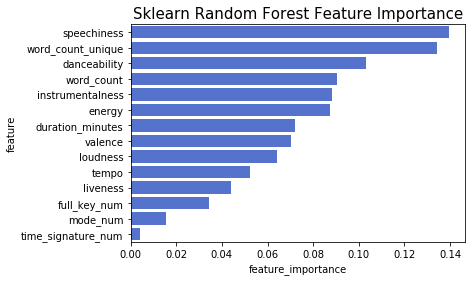

In [74]:
df_feature_importance = pd.DataFrame({'feature': X_train.columns,
                       'feature_importance': rand_forest.feature_importances_}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
        
sns.barplot(x = 'feature_importance', y = 'feature', data = df_feature_importance, orient = 'h', color = 'royalblue').set_title('Sklearn Random Forest Feature Importance', fontsize = 15)
        
plt.show()

In [72]:
%%capture
param_grid_xg = {'booster': ['gblinear', 'gbtree'], 'n_estimators': range(1, 20)} 
xg_grid = xgb.XGBClassifier()
xg_gridsearch = GridSearchCV(estimator= xg_grid, param_grid= param_grid_xg, cv=5)
xg_gridsearch.fit(X_train, y_train)

In [73]:
xg_gridsearch.best_score_, xg_gridsearch.best_estimator_

(0.65675, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
        colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
        max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
        n_estimators=19, n_jobs=1, nthread=None, objective='multi:softprob',
        random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
        seed=None, silent=None, subsample=1, verbosity=1))

In [80]:
xgb_grid = xgb.XGBClassifier(random_state=0, max_depth=3, n_estimators=19)
xgb_grid.fit(X_train, y_train)
y_pred2 = xgb_grid.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(print(classification_report(y_test, y_pred2)))

[[284   5  13  56  54]
 [ 14 284  25  30  45]
 [  5  15 331  35  12]
 [104  20  57 199  39]
 [ 80  43   9  37 204]]
                  precision    recall  f1-score   support

         Country       0.58      0.69      0.63       412
Electronic/Dance       0.77      0.71      0.74       398
         Hip-Hop       0.76      0.83      0.79       398
             Pop       0.56      0.47      0.51       419
            Rock       0.58      0.55      0.56       373

     avg / total       0.65      0.65      0.65      2000

None


/Users/varunraja/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [86]:
#Reset train test split X and Y arrays with all 16 variables

lyrics = spotify_df.lyrics_cleaned

X_train, X_test, y_train, y_test = train_test_split(lyrics, target, test_size = 0.2, random_state = 0)

# define our model
genre_clf = Pipeline(
    [('vect', CountVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

# train our model on training data
genre_clf.fit(X_train, y_train)  

# score our model on testing data
y_pred = genre_clf.predict(X_test)
np.mean(y_pred == y_test)

0.5825

In [88]:
# define our model
genre_clf = Pipeline(
    [('vect', TfidfVectorizer()),
     ('clf', MultinomialNB(alpha=0.1))])

# train our model on training data
genre_clf.fit(X_train, y_train)  

# score our model on testing data
y_pred = genre_clf.predict(X_test)
np.mean(y_pred == y_test)

0.5765